# COMP90051 Statistical Machine Learning Project 1

### Extracting, Transforming and Loading Data

A git ignore has been added to the data file to avoid pushing data to git. However, to use the repository we have saved the raw json files downloaded from Kaggle to a folder labelled 'raw' within the data file. We also had an empty folder labelled 'extracted' within the data folder to save our data after transforming it. These folders can be seen through the paths.json file we created and stored in the scripts folder.

We then ran the following ETL script, parsing the paths.json file as an argument.

In [72]:
%run "../scripts/ETL.py" ../scripts/paths.json

Jsons have been converted to dataframes and saved to data/extracted


This script firstly transforms all the json files to dataframes.

After inspecting both machine and human data, we noticed that the machine data contained an extra field labelled 'machine_id' that the human data did not have. Using the distinct function, we observed that the machine id field contained integers from 0 to 4 to indicate the machine model used to generate the instance. Because of this, we added this field to the human data for mergeability. We assigned 'machine_id' = 5 to all human data, indicating that the instance was human generated.

We were then able to merge the human and machine data, and were left with a dataframe for domain 1 data and domain 2 data.

Because our goal was not to predict what model was used to generate each instance, but rather to predict if it was human or machine generated, we also created an extra field called 'label' where we assigned 'label' = 0 for machine data and 'label' = 1 for human data.

These dataframes, as well as the testing data was then saved as a csv file to the extracted data folder.

### Observing Data

After running the ETL script, the dataframes can be observed below.

In [53]:
d1.head(5)

,prompt,txt,machine_id,label
0,"[1759, 4203, 1493, 3153, 1499]","[1479, 3457, 2277, 1827, 1493, 2582, 3723, 147...",5,1
1,"[1502, 1557, 1487, 1479, 3402, 1551, 1602, 286...","[721, 2820, 1676, 4, 76, 2130, 1502, 1591, 148...",5,1
2,"[3650, 1822, 1500, 4075, 15, 1510, 87, 1683, 1...","[2732, 3882, 1801, 1479, 2833, 2622, 2874, 156...",5,1
3,"[1518, 2556, 15, 1612, 1490, 1598, 2409, 1484,...","[1479, 4758, 1734, 1511, 1500, 1479, 91, 10, 8...",5,1
4,"[1518, 1519, 4640, 2858, 1865, 1622, 1520, 147...","[4683, 1751, 2004, 1485, 1499, 15, 1574, 2193,...",5,1


In [27]:
d2.head(5)

,prompt,txt,machine_id,label
0,"[47, 2328, 1484, 1737, 36, 37, 4609, 1772, 157...","[55, 1497, 3396, 3860, 85, 1624, 1486, 1525, 5...",5,1
1,"[58, 36, 54, 43, 44, 49, 42, 55, 50, 49, 1737,...","[36, 2318, 42, 50, 51, 3717, 2493, 42, 72, 409...",5,1
2,"[39, 82, 93, 1943, 1500, 1481, 2140, 2389, 147...","[54, 1540, 1589, 1500, 44, 3882, 1705, 1478, 1...",5,1
3,"[1737, 51, 1489, 81, 54, 87, 1643, 56, 2462, 2...","[36, 86, 68, 3273, 1936, 15, 1479, 56, 17, 54,...",5,1
4,"[1737, 51, 1647, 1705, 1480, 3486, 2318, 1500,...","[44, 87, 1515, 1479, 1510, 1564, 1480, 51, 148...",5,1


In [28]:
test.head(5)

,prompt,txt
0,"[2109, 2263, 86, 1868, 1528, 1911, 1506, 17]","[1571, 2130, 1499, 1479, 4611, 86, 1631, 2111,..."
1,"[2267, 1890, 3460, 6, 3836, 29, 1599, 72, 1860]","[76, 2277, 2443, 1479, 2185, 1888, 1493, 1873,..."
2,"[1602, 2770, 4021, 1727, 1686, 2930, 1484, 177...","[1490, 76, 2044, 1484, 1479, 1614, 2386, 15, 1..."
3,"[1939, 2059, 1628, 1551, 29, 1518, 1609, 1502,...","[13, 1586, 1901, 2325, 1485, 1479, 3658, 1828,..."
4,"[3101, 1479, 2564, 1500, 2439, 2586, 2093, 159...","[76, 1549, 81, 10, 87, 1640, 1586, 10, 86, 237..."


We also observe the instance counts for each of the datasets.

In [40]:
print("Count for domain 1 data: \n", d1.count(), "\n")
print("Count for domain 2 data: \n", d2.count(), "\n")
print("Count for test data: \n", test.count(), "\n")

Count for domain 1 data: 
 prompt        126084
txt           126084
machine_id    126084
label         126084
dtype: int64 

Count for domain 2 data: 
 prompt        500
txt           500
machine_id    500
label         500
dtype: int64 

Count for test data: 
 prompt    1000
txt       1000
dtype: int64 



It is important to check how balanced our dataset is.

<Axes: title={'center': 'Number of instances of each label in Domain 1'}, xlabel='label'>

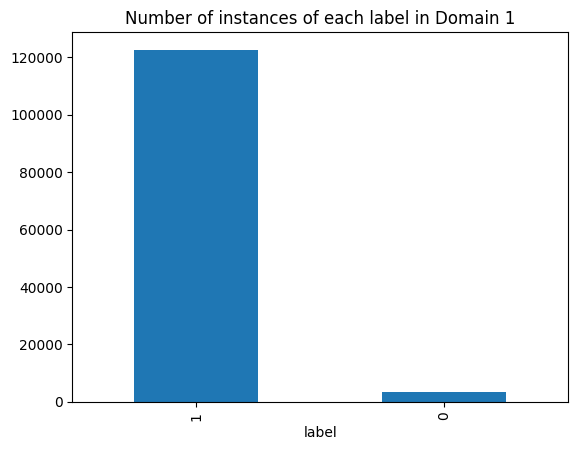

In [45]:
d1['label'].value_counts().plot(kind = 'bar', title = 'Number of instances of each label in Domain 1')

<Axes: title={'center': 'Number of instances of each label in Domain 2'}, xlabel='label'>

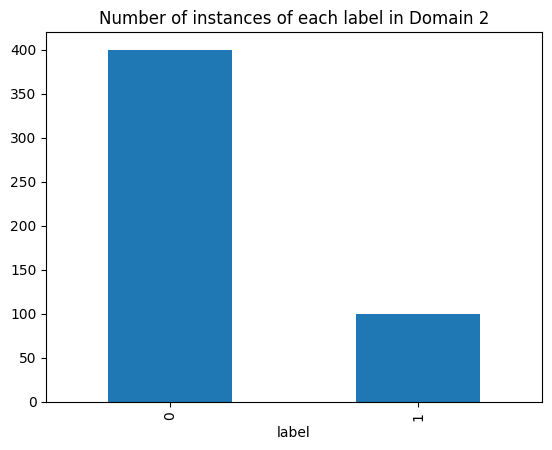

In [46]:
d2['label'].value_counts().plot(kind = 'bar', title = 'Number of instances of each label in Domain 2')

As we can see from the above bar plots, both of our datasets are quite imbalanced, with domain 1 having significantly more human data, and domain 2 having significantly more machine data. We will need to take this into consideration when applying machine learning techniques to this data.

### Count Vectorisation (TF-IDF)

In order to add less weighting on less meaningful words and potentially gain some insight into what specific words are more commonly used by humans vs what words are more commonly used by machines, we have chosen to use a word vectorisation method called Term Frequency - Inverse Document Frequency (TF-IDF). Term frequency calculates the proportional frequency in which a word appears in a text instance, while inverse document frequency calculates the inverse of the proportion of text instances that contain that word. While term frequency captures the importance of a specific word in a single instance, the inverse document frequency penalises words that appear in too many instances as they are less likely to be meaningful.

TF-IDF multiplies these two terms together to create a single score for each word where meaningful words that appear frequently in an instance are assigned a value closer to 1 than a word that doesn't appear or is less meaningful.

In [21]:
%run "../scripts/count_vectorise.py" ../scripts/paths.json d1.csv
%run "../scripts/count_vectorise.py" ../scripts/paths.json d2.csv
%run "../scripts/count_vectorise.py" ../scripts/paths.json test.csv

d1.csv has been vectorised
d2.csv has been vectorised
test.csv has been vectorised


The new features in the dataset can be viewed as such:

In [22]:
v_data.head(5)

,prompt,txt,10,102,104,109,11,116,117,118,...,86,87,88,89,90,91,92,93,95,97
0,"[2109, 2263, 86, 1868, 1528, 1911, 1506, 17]","[1571, 2130, 1499, 1479, 4611, 86, 1631, 2111,...",0.153514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.107339,0.000000,0.0,0.000000,0.0,0.0,0.035421,0.0,0.0,0.0
1,"[2267, 1890, 3460, 6, 3836, 29, 1599, 72, 1860]","[76, 2277, 2443, 1479, 2185, 1888, 1493, 1873,...",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035315,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,"[1602, 2770, 4021, 1727, 1686, 2930, 1484, 177...","[1490, 76, 2044, 1484, 1479, 1614, 2386, 15, 1...",0.141750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115633,0.025756,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,"[1939, 2059, 1628, 1551, 29, 1518, 1609, 1502,...","[13, 1586, 1901, 2325, 1485, 1479, 3658, 1828,...",0.083985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082213,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,"[3101, 1479, 2564, 1500, 2439, 2586, 2093, 159...","[76, 1549, 81, 10, 87, 1640, 1586, 10, 86, 237...",0.101083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049475,0.027550,0.0,0.055632,0.0,0.0,0.000000,0.0,0.0,0.0


### Baseline Model

Because we know our data is very imbalanced, we are mindful that we may obtain high validation scores simply by having a model biased towards the label with more instances. Therefore, before we attempt to create any meaningful ML models, we create a 0-R model and measure it's validation scores as a baseline model.

In [ ]:
%run "../scripts/baseline.py" ../scripts/paths.json d1.csv